## Problem Statement

Working as a growth strategist for the owners of the SAT exams, College Board, which state should I recommend the non-profit to open new SAT exam centers to support the increase in demand (if any)?

### Given Data




* [`sat_2017.csv`](./data/sat_2017.csv): 2017 SAT Scores by State
* [`sat_2018.csv`](./data/sat_2018.csv): 2018 SAT Scores by State
* [`sat_2019.csv`](./data/sat_2019.csv): 2019 SAT Scores by State
* [`sat_2019_by_intended_college_major.csv`](./data/sat_2019_by_intended_college_major.csv): 2019 SAT Scores by Intended College Major
* [`sat_act_by_college.csv`](./data/sat_act_by_college.csv): Ranges of Accepted ACT & SAT Student Scores by Colleges

### Outside Research

According to College Board, in 2019, the SATs have __[55% of the market share.](https://newsroom.collegeboard.org/over-22-million-students-class-2019-took-sat-largest-group-ever#:~:text=Over%202.2%20Million%20Students%20in,Group%20Ever%20%7C%20The%20College%20Board)__
In the class of 2019, __[2.2 million](https://newsroom.collegeboard.org/over-22-million-students-class-2019-took-sat-largest-group-ever#:~:text=Over%202.2%20Million%20Students%20in,Group%20Ever%20%7C%20The%20College%20Board)__ high school students took the SATs, attesting to the exam's popularity. Since the launch of the __[free Khan Academy test prep](https://blog.olive-book.com/sat-vs-act-which-is-more-popular/)__, the SATs have experienced continuous growth up till 2019. Thus, if the SATs had a certain budget allocated for creating new SAT test centers, which state should they pick based on the data provided in this study?

## Data Import and Cleaning

In [ ]:
# Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sat_2017 = pd.read_csv('data/sat_2017.csv')
sat_2018 = pd.read_csv('data/sat_2018.csv')
sat_2019 = pd.read_csv('data/sat_2019.csv')
sat_2019_major = pd.read_csv('data/sat_2019_by_intended_college_major.csv')

In [42]:
# Add a 'Year' column to each DataFrame
sat_2017['year'] = 2017
sat_2018['year'] = 2018
sat_2019['year'] = 2019

#rename columns to lowercases
sat_2018.rename(columns={"State":"state", "Participation":"participation", "Evidence-Based Reading and Writing":"ebrw", "Math":"math", "Total":"total"}, inplace=True)
sat_2017.rename(columns={"State":"state", "Participation":"participation", "Evidence-Based Reading and Writing":"ebrw", "Math":"math", "Total":"total"}, inplace=True)
sat_2019.rename(columns={"State":"state", "Participation Rate":"participation", "EBRW":"ebrw", "Math":"math", "Total":"total"}, inplace=True)

# Concatenate the dataframes
sats = pd.concat([sat_2017, sat_2018, sat_2019], ignore_index=True)

# Remove '%' sign from 'Participation' and convert to numeric in one step
sats['participation'] = pd.to_numeric(sats['participation'].str.replace('%', ''), errors='coerce')

In [44]:
sats = sats[sats['participation']!= "—"].reset_index(drop=True)

In [62]:
sats.loc[20, 'math'] = 524

In [ ]:
#some math plus verbal totals did not add up, but I decided to skip this as the difference was only by 1 point in the total SAT score.

In [90]:
#drop invalid state names.
sats = sats[~sats['state'].isin(['Puerto Rico', 'Virgin Islands'])].reset_index(drop=True)

### Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|*string*|sat_2017|The name of the states in the US, there are 50 states in total. + 1 extra state: District of Colombia| 
|**participation**|*float*|sat_2017|The percentage of the participation rate of each state.|
|**ebrw**|*int*|sat_2017|The English section score (score range = 200-800).| 
|**math**|*int*|sat_2017|The Math section score (score range = 200-800).| 
|**total**|*int*|sat_2017|The total final weighted score by adding the verbal 'ebrw' and 'math' scores.|

## Exploratory Data Analysis

In [ ]:
#filter states with greater than 80% participation
sats[sats['participation'] > 80.0]

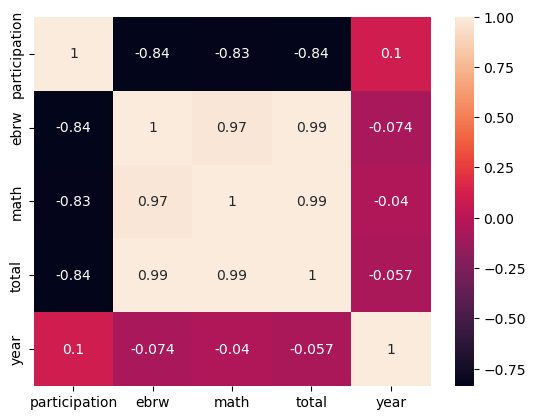

In [105]:
#Heat Map: Participation and Total are negatively correlated -0.84 others are also very close to 1, which tends to indicate good correlation.
sns.heatmap(sats.corr(numeric_only=True), annot=True);

In [ ]:
#plot barchart
plt.figure(figsize=(14, 30))
palette = ['#FEC000', '#0788CA', '#46596F'] #medium blue, dark blue, teal blue #0CC9E5
sns.barplot(x='participation', y='state', data=sats, hue='year', palette=palette)
plt.title("Participation by Year")
plt.savefig('state_participation_by_year.png', format='png')
plt.show();

In [ ]:
plt.figure(figsize=(14, 30))
palette = ['#FEC000', '#0788CA', '#46596F']
sns.barplot(x='participation', y='state', data=sats.sort_values('participation', ascending=False), hue='year', palette=palette)
plt.title("Sorted Participation by Year")
plt.savefig('sorted_state_participation_by_year.png', format='png')
plt.show();

In [ ]:
#attempting to check for states with consistent 80%-100% participation 2017, 2018, 2019
sats_pivot = sats[sats['participation'] > 0.8].pivot(index='state', columns='year', values='participation')
sats_pivot.sort_values(by = [2017, 2018, 2019], ascending=False).fillna('--')

In [ ]:
#histogram for participation
plt.hist(sats['participation'], bins=15);
plt.title('Distribution of Participation Rate');
plt.ylabel('Participation Rate');
plt.xlabel('Frequency');
plt.savefig('histo_participation.png', format='png')

In [ ]:
#histogram for total score
plt.hist(sats['total'], bins=40);
plt.title('Distribution of Total Average SAT Scores 2017-2019');
plt.ylabel('Total SAT Score');
plt.xlabel('Frequency');
plt.savefig('histo_total.png', format='png')

In [ ]:
# plotting scatter plot for the participation rate vs. total SAT score

fig, axs = plt.subplots(1,2, figsize=(18,6))

axs[0].plot(sats['total'], sats['participation'], 'b.');
axs[0].set_title('Particiption Rate vs SAT Total Score');
axs[0].set_ylabel('Particiption Rate (%)');
axs[0].set_xlabel('Total SAT Score');

In [ ]:
#create jointplot
jointplot_sat = sns.jointplot(x='total', y='participation', data=sats, hue='year')

# Add titles and axis labels
jointplot_sat.fig.suptitle('Participation and SAT Scores by Year', fontsize=16)
jointplot_sat.set_axis_labels('Total SAT Score', 'Participation Rate (%)', fontsize=12)

jointplot_sat.ax_joint.set_xlim(800, 1400)  # Set x-axis limits
jointplot_sat.ax_joint.set_ylim(0.0, 1.05)  # Set y-axis limits

# Adjust the title position to avoid overlapping
jointplot_sat.fig.tight_layout()
jointplot_sat.fig.subplots_adjust(top=0.95)
jointplot_sat.fig.savefig('jointplot_parti_and_year.png', format='png')
plt.show();

In [ ]:
#create the box plot
sats.boxplot(by='year', column=['total'])

# Add title and labels
plt.title('Box and Whiskers Plot for Total SAT Scores', fontsize=15)
plt.suptitle('')  # Remove automatic suptitle
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total SAT Score', fontsize=12)
plt.savefig('box_whiskers_total_sat.png', format='png')
plt.show()

In [ ]:
# Percentage change for SAT participation rates in 2017, 2018, 2019

#make a percentage change pivot df 'sats_pct_change'
# Extract unique years dynamically
sats_years = sorted(sats['year'].unique())

# Pivot the data using the dynamic list of years
sats_pivot = sats.pivot(index='state', columns='year', values='participation')

# Replace NaN values with 0 or any other value (if necessary)
sats_pivot = sats_pivot.fillna(0)

# Calculate year-over-year percentage change
sats_pct_change = sats_pivot.pct_change(axis=1) * 100

# Reset the index so that 'person_name' becomes a column again
sats_pct_change = sats_pct_change.reset_index()

# make a csv file for percentage change values
sats_pct_change.to_csv('sats_pct_change.csv', index=False)

In [ ]:
df = pd.read_csv("sats_pct_change.csv")

#Torn's code
df['change'] = (df['2019'] - df['2018']).abs()
df_select = df[df['change']>50]
df_select.count()

plt.figure(figsize=(10, 6))

for index, row in df_select.iterrows():
    plt.plot(['2019', '2018'], [row['2019'], row['2018']], marker='o', label=row['state'])

plt.title('Highest Percentage Change of Participation for Each State')
plt.xlabel('Year')
plt.ylabel('% Change of Participation Rate')
plt.legend(title='States')
plt.grid(True)
plt.show()

## Conclusions and Recommendations

Based on the exploration of the data, the key takeaway is to keep the test centers with consistently high total scores and participation for the Northeastern states. States with a steep positive increase in participation percentage growth are explained by mandatory policy changes in . Potential state areas for new test centers, are therefore . However, more data is needed before allocating precious resources to building new examination locations.